Links for 1000 most common words (last accessed 14-MAY-2024):

english: https://www.ef.edu/english-resources/english-vocabulary/top-1000-words/    (last accessed 14-MAY-2024)

spanish: https://strommeninc.com/1000-most-common-spanish-words-frequency-vocabulary/   (last accessed 14-MAY-2024)

russian: http://masterrussian.com/vocabulary/most_common_words.htm  (last accessed 15-MAY-2024)

arabic: https://1000mostcommonwords.com/1000-most-common-arabic-words/ (last accessed 17-MAY-2024)

In [1]:
# Imports
from methods import *
from nltk.stem import SnowballStemmer
import matplotlib.pyplot as plt
import os
import string
import pylab as plot
from matplotlib_venn import venn3
import numpy as np
import pandas as pd

# Initialize paths
languagesDir = r'data\languages'
sampleDir = r'data\samplesDocs'


In [18]:
# Reads the data of the 1000 most common words in the given languages from the data/languages folder
# Here the language is KNOWN
langDict = readData(languagesDir)

# Tokenizes every word based on the language
stemDict  = stem(langDict)

for language in stemDict:
    stemDict[language] = list(set(stemDict.get(language)))

word_count = {}

for words in stemDict.values():
    for word in words:
        if word in word_count:
            word_count[word] += 1
        else:
            word_count[word] = 1

# Step 2: Iterate over the original dictionary and remove words that appear in multiple languages
for language in stemDict:
    stemDict[language] = [word for word in stemDict[language] if word_count[word] == 1]

In [19]:
print(stemDict)

{'arabic': ['مزلاج', 'شارع', 'هادء', 'جبل', 'رحل', 'رقص', 'سباق', 'ديك', 'عادل', 'نظام', 'سقط', 'مساعد', 'ستا', 'تاثير', 'كوكب', 'الى الامام', 'فتر', 'حكم', 'سكة حديد', 'كلم', 'تيار', 'على مدار الساع', 'تتطلب', 'ارض', 'حيا', 'خلال', 'مسال', 'تهم', 'ارتداء', 'نهاء', 'خبز', 'قرن', 'جزير', 'ارسل', 'تطوير', 'نها', 'شعر', 'ربطة عنق', 'علب', 'منخفض', 'واحد', 'تقرر', 'نعم', 'بحر', 'كلام', 'معا', 'نامل', 'غاب', 'نتاج', 'شباب', 'في', 'حيو', 'الان', 'التل', 'ضوضاء', 'مقبل', 'نجم', 'سيطر', 'كتف', 'خطو', 'هم', 'سطح', 'هو', 'عصاب', 'اختر', 'ارب', 'قارب', 'جذر', 'قطن', 'تسجيل', 'تاكيد', 'قادر', 'اعداد', 'اللغ', 'رجاء', 'تال', 'اصفر', 'ذهب', 'ارد', 'ارقام', 'ربم', 'تحتوي على', 'له', 'تمر', 'اكثر', 'ولا', 'صلب', 'بحث', 'من', 'مصنوع', 'طبع', 'واسط', 'راد', 'ملح', 'من خلال', 'اشتعل', 'موسم', 'مطالب', 'نتيج', 'جميل', 'مرة اخرى', 'توفير', 'فعل', 'تعتمد', 'حطم', 'دعوى', 'عشرو', 'ضحك', 'سفر', 'قر', 'توقف', 'تاريخ', 'فوز', 'يا', 'ي وقت مبكر', 'ايض', 'طباع', 'سواء', 'معتاد', 'قذيف', 'تحت', 'اطفال', 'اقل', 'كا

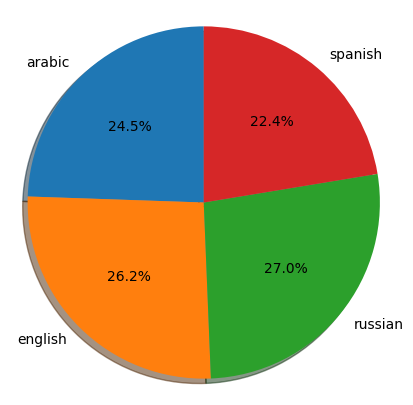

In [20]:
# Displays the samples for each different language as a percentage of a pie chart
fig = plt.figure(figsize=(5, 5))

# labels for the keys of our language dict
labels = stemDict.keys()

# Sizes of slice
sizes =  []
for i in list(stemDict.values()):
    sizes.append(len(i))

# Declare pie chart, where the slices will be ordered and plotted counter-clockwise:
plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')  
plt.show()

In [21]:
# Create a new dictionary
langScores = {}

# for every document we have in a given directory, get the vectorized language scores of the document
# and add it to the dictionary as a value with the respective key being the name of the file
# Here the language is NOT KNOWN

# progress bar tracker
l = len(os.listdir(sampleDir))
printProgressBar(0,l,prefix = 'Progress:', suffix = 'Complete', length = 50)

for file in range(len(os.listdir(sampleDir))):
    filePath = sampleDir + '/' + os.listdir(sampleDir)[file]

    content = readRawText(filePath)+'\n'
    freqs = freqsCalculator(content, stemDict)
    languageScore = langScore(content, freqs)
    langScores[os.listdir(sampleDir)[file]] = np.array(list(languageScore.values()))

    printProgressBar(file+1, l ,prefix = 'Progress:', suffix = 'Complete', length = 50)

Progress: |██████████████████████████████████████████████████| 100.0% Complete


In [22]:
# Build the matrix and get the labels of the respective points (in this case, the labels are just the file names)
matrix, labels = matrixBuilder(langScores)

# Project the matrix onto 2D and 3D space 
proj_matrix_3D = project_to_3d(matrix)
proj_matrix_2D = project_to_2d(matrix)

# Plot the projections
plot_3d_projection(proj_matrix_3D,labels)
plot_2d_projection(proj_matrix_3D,labels)

In [23]:
df = pd.DataFrame(langScores).transpose().rename(columns={0: 'arabic', 1: 'eng', 2: 'rus', 3: 'span'})

# Find the column name with the max value for each document
max_columns = df.idxmax(axis=1)

result = df.apply(max_column_or_label, axis=1)

df = pd.concat([df,result], axis = 1)
print(df)

                                                      arabic       eng  rus  \
3 landasan utama dienul Islam.txt                   0.000000  0.097423  0.0   
33 SIKAP GHULUW DALAM TAK.txt                       0.000054  0.108190  0.0   
4 kaidah mengetahui kesyirikan _ syaikh muhamma...  0.001167  0.099983  0.0   
44 Ways To Support Jihad.txt                        0.000000  0.295197  0.0   
5_106434014058905971.txt                            0.000000  0.117273  0.0   
...                                                      ...       ...  ...   
_____ ________ ___ ____ _____ _______ ____ ___.txt  0.032096  0.000051  0.0   
_______ __ ___ _____ _______.txt                    0.000000  0.000000  0.0   
_______ ___ ____ _______.txt                        0.236528  0.000004  0.0   
_______ _____.txt                                   0.000000  0.000000  0.0   
الارض مسطحة 3.txt                                   0.219408  0.001402  0.0   

                                                   